Enter the stock symbol:  AAPL
Enter the start date (YYYY-MM-DD):  2022-01-01
Enter the end date (YYYY-MM-DD):  2023-02-15


[*********************100%%**********************]  1 of 1 completed


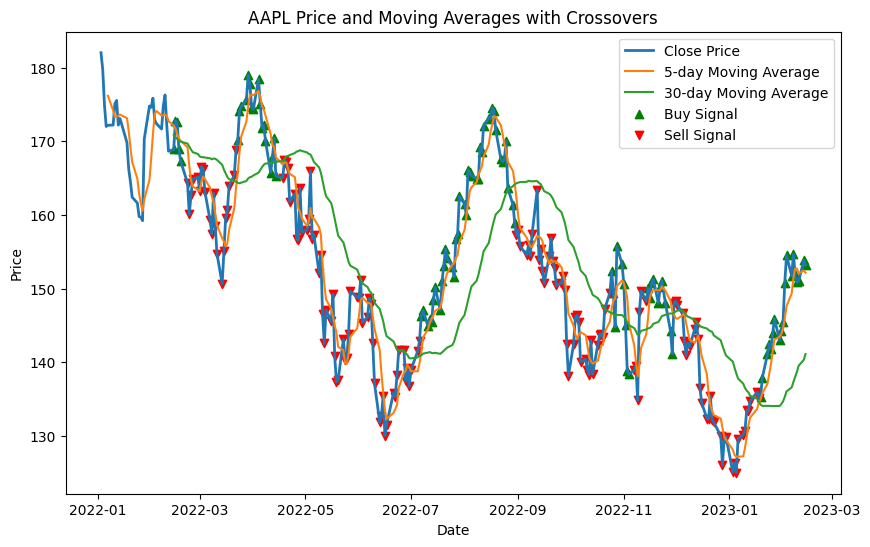

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Take input from user
stock = input("Enter the stock symbol: ")
start = input("Enter the start date (YYYY-MM-DD): ")
end = input("Enter the end date (YYYY-MM-DD): ")

# Download the data from Yahoo Finance
data = yf.download(stock, start, end)

# Calculate the moving average of the 5-day and 30-day periods
data['MA_5'] = data['Close'].rolling(5).mean()
data['MA_30'] = data['Close'].rolling(30).mean()

# Detect crossover points
data['Signal'] = 0
data.loc[data['MA_5'] > data['MA_30'], 'Signal'] = 1  # Buy signal
data.loc[data['MA_5'] < data['MA_30'], 'Signal'] = -1  # Sell signal

# Plot the data and highlight crossover points
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price', linewidth=2)
plt.plot(data['MA_5'], label='5-day Moving Average')
plt.plot(data['MA_30'], label='30-day Moving Average')

# Highlight Buy and Sell signals
plt.scatter(data.index[data['Signal'] == 1], data['Close'][data['Signal'] == 1], color='green', marker='^', label='Buy Signal')
plt.scatter(data.index[data['Signal'] == -1], data['Close'][data['Signal'] == -1], color='red', marker='v', label='Sell Signal')

plt.title(f"{stock} Price and Moving Averages with Crossovers")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
